## Decision Tree - Classification


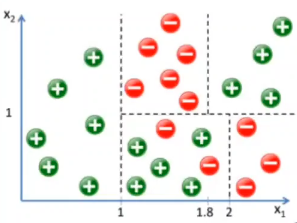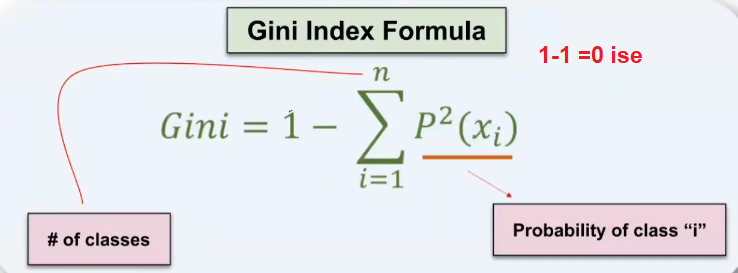

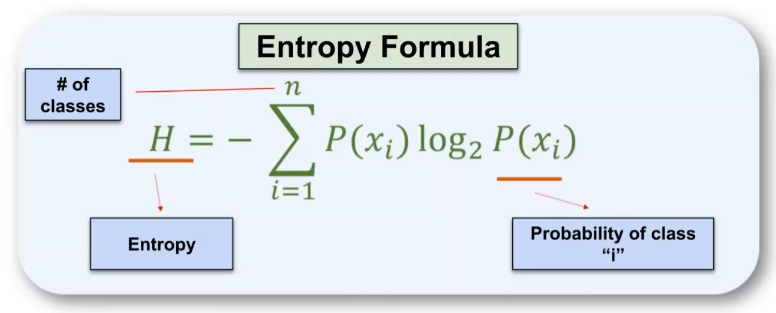

In [ ]:
#gini ayiracagi noktayi belirler,arti eksi grafigindeki noktalari gini ile belirliyor
#Gini katsayisi 0 a yakin olmasi iyi biseydir
#bir bölgede hepsi arti ise entropi sifirdir, arti ve eksi
# asagida agaclarda birini entropiye göre aliyor digerini gini ye göre aliyor

#default gini dir cünkü hesaplama maliyeti entropi ye göre daha azdir

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
10/344

0.029069767441860465

In [7]:
df = df.dropna() #missing value yi drop ediyorum.normalde hemen silmeyebilirsin,doldurabilirsin

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df["sex"].unique()    #burda nokta var sex icinde

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df["island"].unique()  #adalar

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
df[df["sex"]== "."]

 # cinsiyetteki "." olan satırı düzeltilmesi,sadece bir satirda nokta var

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [78]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [14]:
df[df.species =="Gentoo"].groupby("sex").describe().T

#burda tek satiri silmek istemedim, onun nereye ait olduguna bakip. doldurmak istiyorum
#altta Gentoo sinifinin sex e göre describeni aldim, ve yukardaki 1 satira bakip. tahmin edecegim,

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.loc[336, "sex"] = "MALE"   #burda gözle Male olmaya yakin gördük

In [16]:
df.loc[336, "sex"]

'MALE'

## Visualization

In [17]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

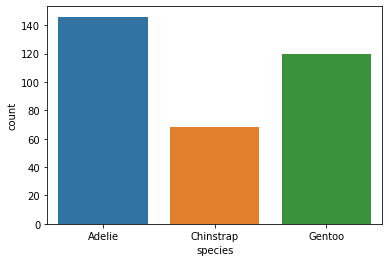

In [18]:
sns.countplot(x="species", data = df);
plt.show()

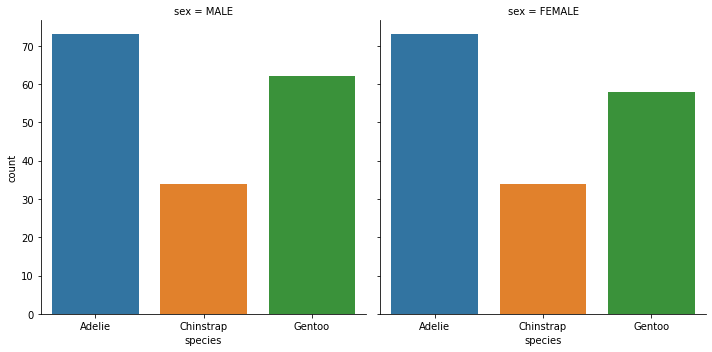

In [19]:
sns.catplot(x='species', data=df, kind='count',col='sex')  #col iki tane yapti
plt.show() # categoric uniqe 

#catplot her cinsiyete göre bakabiliyoruz

<Figure size 864x432 with 0 Axes>

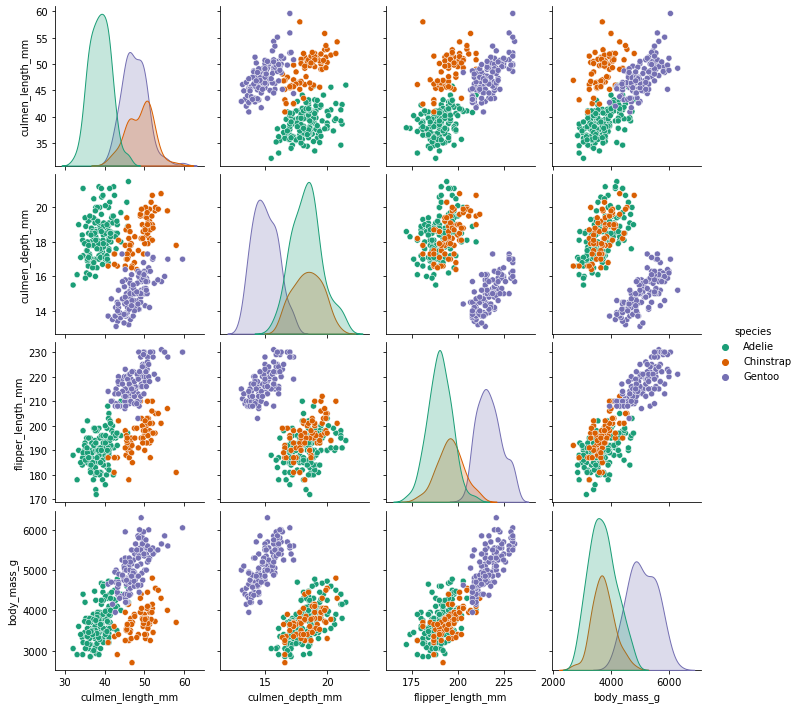

In [20]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')
plt.show()

In [21]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [22]:
# !pip install plotly

maksimum 3 featuremize (3d olduğundan) bu şekilde de bakabiliyoruz.

In [23]:
import plotly.express as px  # 3 d grafik

In [24]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();
#3 boyutlu oldugu icin 3 deger verdik

In [25]:
df.select_dtypes("number")# numeric verileri yazdirip,bunun corr matrix cizdirdik

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


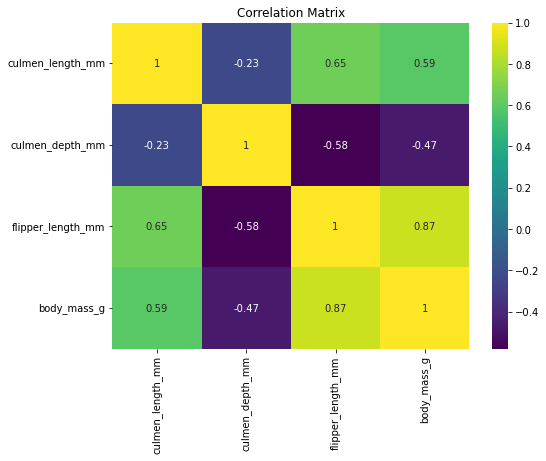

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

# multicolinerity problemi burda yok

## Feature Engineering

In [27]:
df.drop("species", axis =1)  #targeti attim

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True) 
#dummies yaptim, ve features olmasin diye drop_first true yaptim
#sex_Famale li almamis

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [29]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
194,50.9,19.1,196.0,3550.0,1,0,1
22,35.9,19.2,189.0,3800.0,0,0,0
92,34.0,17.1,185.0,3400.0,1,0,0
149,37.8,18.1,193.0,3750.0,1,0,1
156,52.7,19.8,197.0,3725.0,1,0,1
...,...,...,...,...,...,...,...
81,42.9,17.6,196.0,4700.0,0,1,1
93,39.6,18.1,186.0,4450.0,1,0,1
69,41.8,19.4,198.0,4450.0,0,1,1
335,55.1,16.0,230.0,5850.0,0,0,1


In [ ]:
# Burda scaling yapmiyoruz, scaling yapilir ama, yapilmamasi tavsiye edilir
#cünkü bazen 60 alti diye kosul verreceksen, o 60 in karsiligina bakman geekiyor
#bu yüzden pipeline na ihtiyac duymuyorum

# Modelling - Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DT_model = DecisionTreeClassifier(random_state=101)

In [34]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [35]:
y_pred = DT_model.predict(X_test)

In [82]:
y_pred[0:10]

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo'],
      dtype=object)

## Model Performance on Classification Tasks

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)   #predict yaptiriyoruz
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

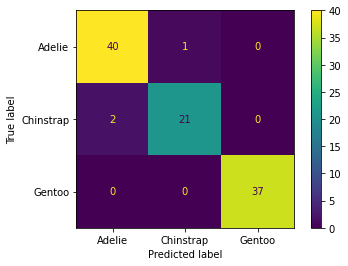

In [38]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt.show()

# model adelie 40 doğru TP,  1 FN hata
# cinstraptan 21 doğru 2 hata
# gento 37 doğru 0 hata

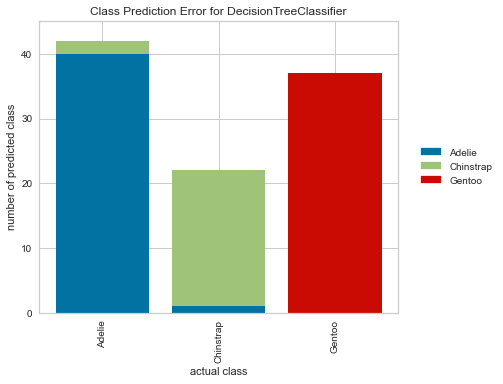

In [39]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor 

In [40]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

#train setinde overfit gibi duruyor fakat test seti değerleri dengeli oldğu için overfitten bahsedemeyiz


Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Cross Validate

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [42]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

#burda yeni model yapti gecici model mi,
#deger bulduktan sonra bu modeli kullanmayacagiz galiba?

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.001854,0.002128,0.958333,0.958333,0.958333,0.958333
2,0.001486,0.001911,0.958333,0.958333,0.958333,0.958333
3,0.001377,0.001974,0.916667,0.916667,0.916667,0.916667
4,0.001346,0.001759,0.956522,0.956522,0.956522,0.956522
5,0.001216,0.001759,1.000000,1.000000,1.000000,1.000000
6,0.001149,0.001738,1.000000,1.000000,1.000000,1.000000
7,0.001247,0.001768,1.000000,1.000000,1.000000,1.000000
8,0.001178,0.001703,1.000000,1.000000,1.000000,1.000000
9,0.001124,0.001741,0.869565,0.869565,0.869565,0.869565
10,0.001123,0.001733,1.000000,1.000000,1.000000,1.000000


In [43]:
df_scores.mean()[2:] 

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

## Feature Importances

In [44]:
DT_model.feature_importances_    
#bu featureslerin yüzdelik önem scorlarini gösteriyorlar
#gini önemli bu konuda 

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [45]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i


#flipper ve culmen %90 a yakin tahimini yapiyor,önem sirasina göre 
#yukardakileri Lassodaki gibi yok sayiyor
# flipper decision tree ye göre en önemli features

#bunlar target labela tahmin etmedeki önem degerleri

#büyük ihtimal flipper bizim root node olacak
#birde bunuda düsürerek bir scor olmak iyi olabilir eger drop yaptiktan 
#sonra modelin nasil davrandiginada bakmak faydali olabilir

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.052893
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


<Figure size 864x432 with 0 Axes>

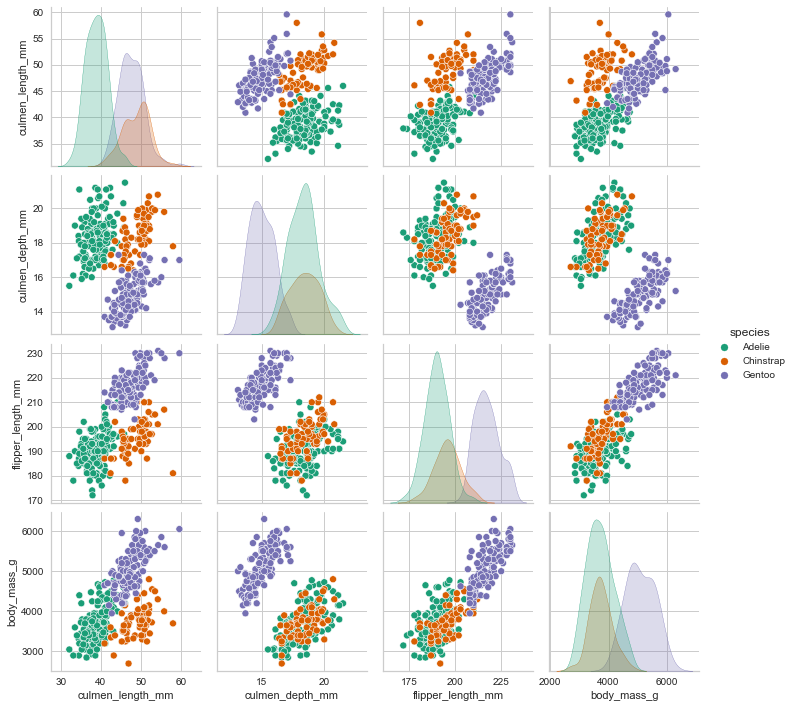

In [84]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')
plt.show();

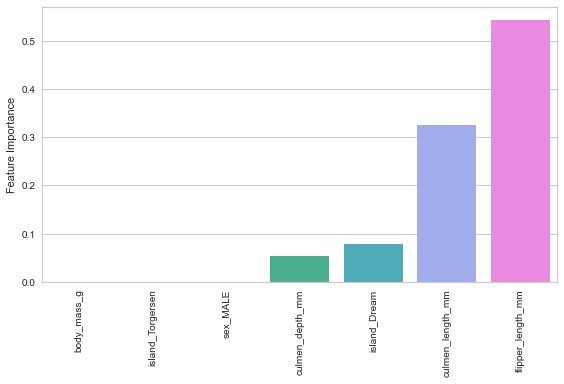

In [46]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#buda önem derecelerini gösteriyor
#erkek kizi ayirt etmek icin sakali veya biyigi var mi derim, iyi ayirir
#bu üc features icin agac olusturmak icin soru sorulmamis ve onlara sifir almis

#aslinda model burda bunu önemli saymis, yoksa bu Allah'in emri gibi öenmli oldugundan olmayabilir,
#model bunu önemli görmüs, ve biz o önemli gördügünü drop edersek ,belki daha iyi degerler alabilecegiz

#ve nitekim asagida drop ettigimizde daha iyi scorlar aldik
#bunun sebei model bunu cok önemsedi ve digerlerini baskiladi, bu cok rastlanan bir durum degildir

In [ ]:
#burda fatih hocanin ders notlarinda söyledigi gibi modele öyle sorular sormaliyizki, 
#yani öyle featuresler ile ayirmaliyzki mümkün olan en kisa sekilde en iyi purity e ayrilsin
#her agaclanma adimi bir esik degerine göre oluyor,
#gini veya entropiye göre dallanma oluyor

In [ ]:
#bazen bir feature öyle baskın olur ki diğerlerini gölgeler.. 
# bu çok sık rastlanan bir durum olmayabilir..  bu örnekte diğer feature ları baskıladı..
#   bu örnek extraordinary bir durum..   her zmaan böyle olmasını beklemeyin..

In [ ]:
#örnegin
#Features boy ve kilo olsun, 
#Başka bir features te sac uzunluğu, hani features kiz ve erkek öğrencileri daha iyi ayirir
#En iyi ayrimi yapan featuresi ilk sormaliyiz,
#Bunu aslinda algoritma yapıyor,

#Siniflari en iyi sekilde ayiran features kök olur.


## Drop most important feature

In [47]:
X2 = X.drop(columns = ["flipper_length_mm"])   #bide drop ederek bakalim belki droplu iyi olacak

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [49]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [50]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [51]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

#eval metric fonksiyonunda pred alan bir bölüm var

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [52]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.002203,0.002489,1.000000,1.000000,1.000000,1.000000
2,0.001725,0.002037,1.000000,1.000000,1.000000,1.000000
3,0.001550,0.002102,0.958333,0.958333,0.958333,0.958333
4,0.002310,0.002046,1.000000,1.000000,1.000000,1.000000
5,0.001588,0.001955,1.000000,1.000000,1.000000,1.000000
6,0.001455,0.002237,1.000000,1.000000,1.000000,1.000000
7,0.001666,0.001980,1.000000,1.000000,1.000000,1.000000
8,0.001442,0.002036,1.000000,1.000000,1.000000,1.000000
9,0.001406,0.001910,1.000000,1.000000,1.000000,1.000000
10,0.001381,0.001960,0.956522,0.956522,0.956522,0.956522


In [53]:
df_scores.mean()[2:] 

##bunu hoca  

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

### Bu sebeple DT de en önemli featuremizi düşürüp birde öyle bakalım skorlar nasıl

In [54]:
from sklearn.metrics import make_scorer

#her bir gözlem için ayrı ayrı skorlara bakmak için make_scorer ile oluştururuz.

In [55]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }
          #burda asagida bir cok seye bakmak icin yazilmis hazir kod

In [56]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

In [57]:
from sklearn.tree import plot_tree

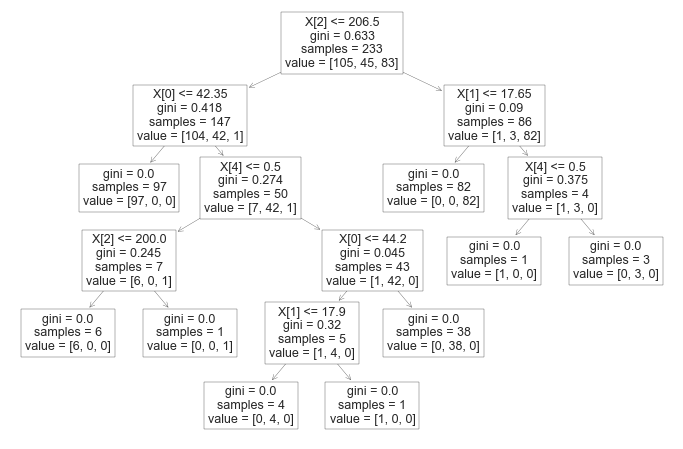

In [58]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);
plt.show()

#burda bizim agacimiz,asagida gelistirilmis hali

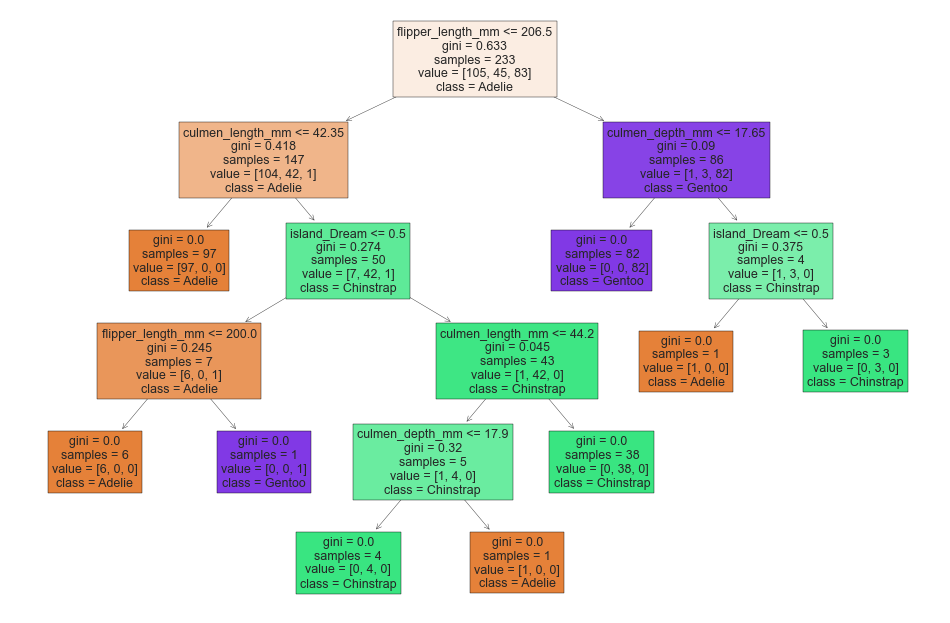

In [85]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
plt.show()

#en alt yapraklarda güzel ayirdigini görüyoruz
#[1,3,0] orda en büyük olan sinif o yapraga adini veriyor

#Gentoo mor
#Chinstrap yesil
#turuncu Adelle

In [ ]:
	Feature Importance
body_mass_g     	0.000000
island_Torgersen	0.000000
sex_MALE    	    0.000000
culmen_depth_mm	    0.052893
island_Dream	    0.078360
culmen_length_mm	0.325918
flipper_length_mm	0.542829

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [60]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [88]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101,min_samples_leaf=5) #, min_samples_split=7 bu parametre en sonra 7nin asagisindaki sample icin yenir bir dallanma yapma anlamina geliyor
pruned_tree.fit(X_train,y_train)

# min_samples_leaf= bir yapragin olmasi icin gerekli olan gözlem sayisi
#pruned_tree  budanmis agac
# DecisionTreeClassifier üzerine gelince parametrenin anlamlarini veriyor


DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=101)



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  3 80]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.80      1.00      0.89        45
      Gentoo       1.00      0.96      0.98        83

    accuracy                           0.95       233
   macro avg       0.93      0.96      0.94       233
weighted avg       0.96      0.95      0.95       233



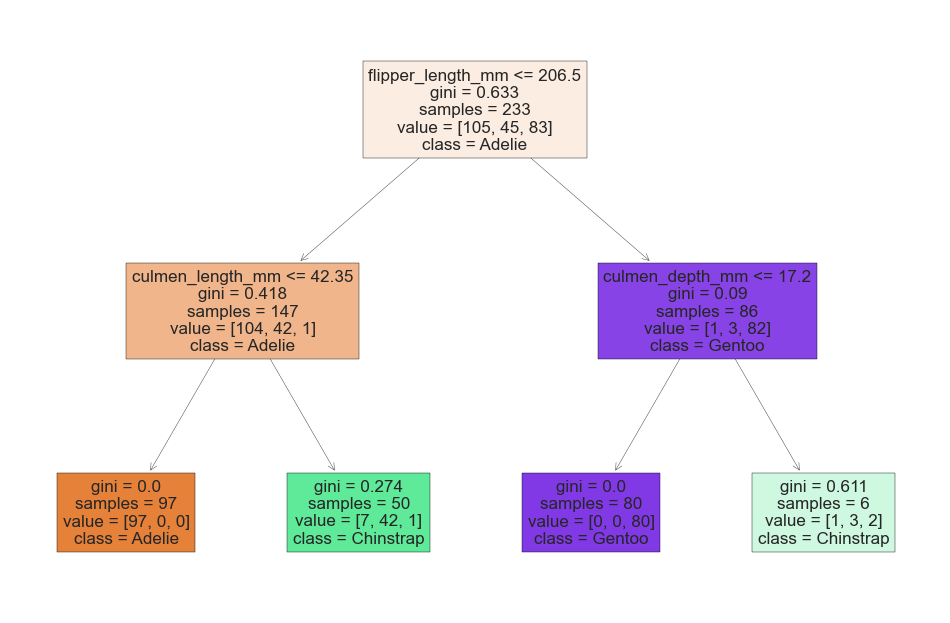

In [90]:
report_model(pruned_tree)

#bir üstte max_dept =2 aldigimizda alacagimiz scorlar

#katman sayisi ilk root node tan sonra olan katma sayisi
#ayrimi gini ye göre yapiyor

#agactaki [] icindeki sayilar recall ve precision degerlerde baglantili

### Max Leaf Nodes

In [91]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101,) #max_leaf_nodes bu kenarlarda olusan yaprak sayilarini gösteriyor
pruned_tree_2.fit(X_train,y_train)

#Max Leaf Nodes == en sonda kalan leaf yaprak sayısını ayarlar
#100 yazsan 100 yaprak cikmayailibiir en iyi ayirdiktan sonra durur


DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



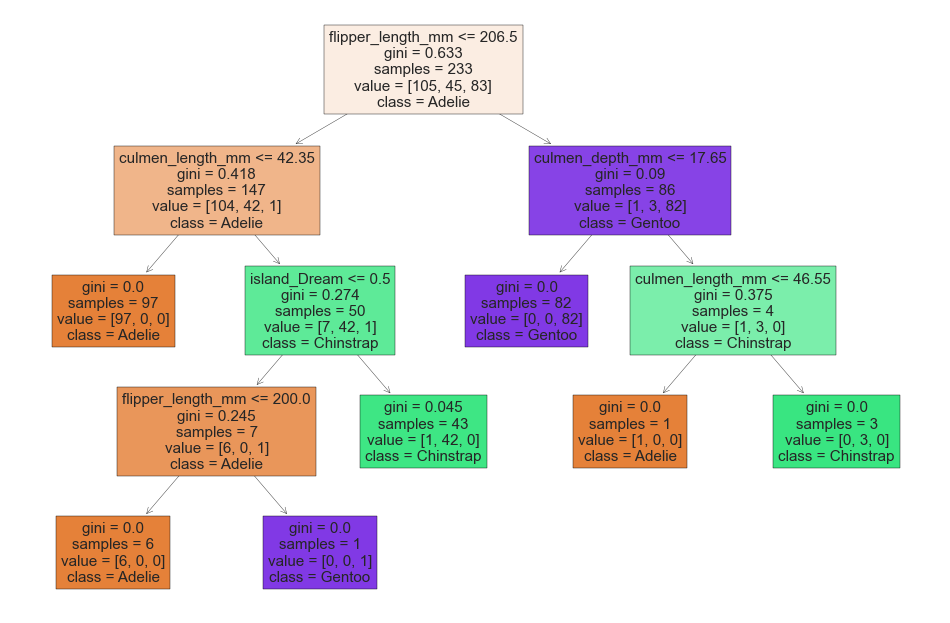

In [92]:
report_model(pruned_tree_2)

## Criterion

In [65]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)   #burda entropy ye göre yaptik ama gini ye göre yapilir
entropy_tree.fit(X_train,y_train)

# bölme kriteridir. gini = 0 ise hepsi aynı sınıftır.



DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



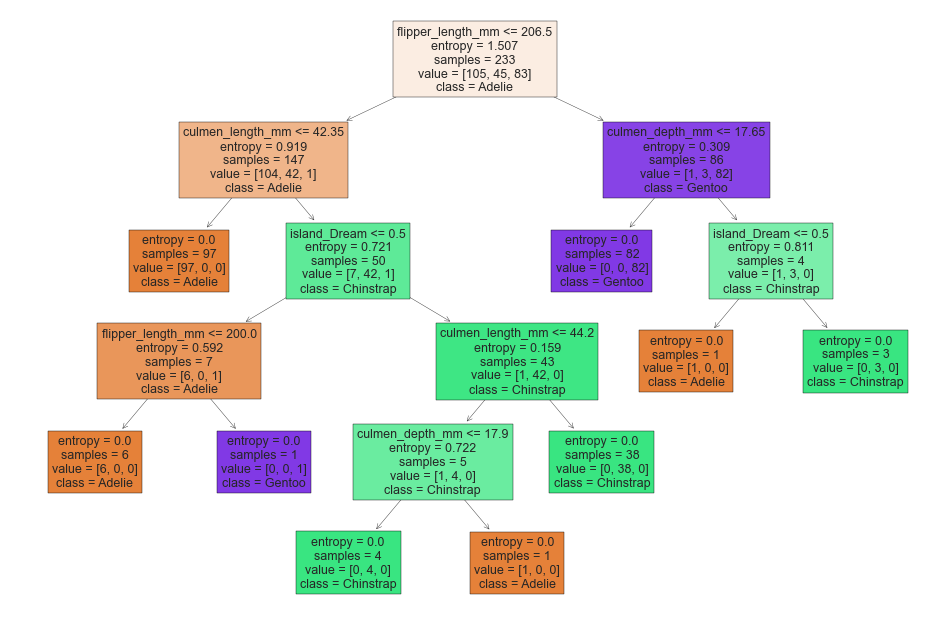

In [66]:
report_model(entropy_tree)

#train datasi böyle hep 1 cikarsa, overftting durumuna bakmaliyiz ama bu datada uyumlu cikmis

## Max_features, Splitter

In [93]:
tree = DecisionTreeClassifier(splitter = "best") #max_features max 2 features sec, ve bunu random seciyor
tree.fit(X_train,y_train)

DecisionTreeClassifier()



Test Set
[[39  2  0]
 [ 4 19  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



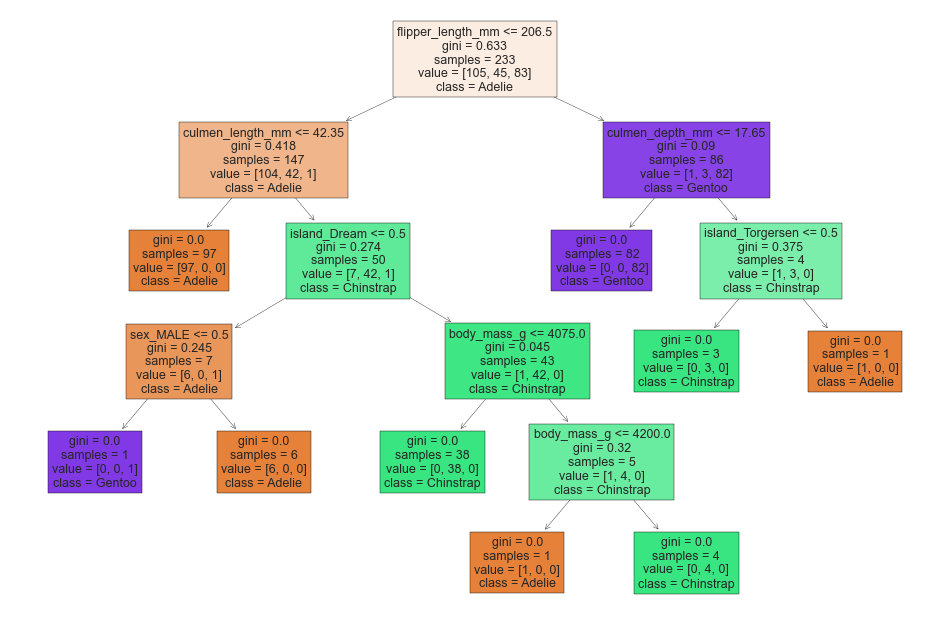

In [94]:
report_model(tree)

## Find Best Parameters

In [69]:
np.log2(9)

3.169925001442312

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
model = DecisionTreeClassifier(random_state=101)

In [72]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

# hyperparametreleri gridSearc e verip skorlara bakarızbiraz uzun sürer data sayimiz fazla ise
# max_depth hard , splitter soft budama yapar. bazi parametreler hard bazilari soft,yani ince ayarlar yapmak icin 
# randomize search cv kullanırsan GridSearchCV random olarak yapar daha az işlem yapabilir. 
# lasso gibi davranarak,featureslerin katsayisini 0 yapar ve isleme almaz


# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [73]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [74]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [75]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [76]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

